## Description
This notebook contain the code that was used to extract useful single trial data from other trials.  I used GMM and K-Means clustering to cluster the data into four clusters( this is note fixed). The assumption is that the most useful triasl will be in one and the biggest cluster

In [1]:
import numpy as np
from numpy import save
import pandas as pd
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from numpy import load
from sklearn.preprocessing import StandardScaler

### Loading and normalizing the data
First I loaded my single trial data from four cognitive load levels (level;2,4,6,8). I normalized that data using standard scaler

In [2]:


### Loading single trial data
raw_data2= load("data_2.npy")
raw_data4= load("data_4.npy")
raw_data6= load("data_6.npy")
raw_data8= load("data_8.npy")

## Standardize the data
from sklearn.mixture import GaussianMixture
scaler=StandardScaler ()
raw_data2_sc= scaler.fit_transform(raw_data2.reshape(raw_data2.shape[0],-1))
raw_data4_sc= scaler.fit_transform(raw_data4.reshape(raw_data4.shape[0],-1))
raw_data6_sc= scaler.fit_transform(raw_data6.reshape(raw_data6.shape[0],-1))
raw_data8_sc= scaler.fit_transform(raw_data8.reshape(raw_data8.shape[0],-1))


### Clutsering 1 : GMM on original data without feature selection

In [10]:

from sklearn.model_selection import cross_val_score as cv
from sklearn.metrics import f1_score   
from sklearn.metrics import davies_bouldin_score as db

def gmm_fit(data):
    clf1=GaussianMixture(2,"full")
    clf2= GaussianMixture(2,"tied")
    clf3= GaussianMixture(2,"diag")
    clf4= GaussianMixture(2, "spherical")
    ypred=[clf1.fit_predict(data),clf2.fit_predict(data),clf3.fit_predict(data),clf4.fit_predict(data)]
    
    return db_scores

db_score2= gmm_fit(raw_data2_sc)
db_score4= gmm_fit(raw_data4_sc)
db_score6= gmm_fit(raw_data6_sc)
db_score8= gmm_fit(raw_data8_sc)


/home/kashraf/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass covariance_type=full as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/kashraf/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass covariance_type=tied as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/kashraf/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass covariance_type=diag as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/kashraf/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass covariance_type=spherical as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/kashraf/anaconda3/lib/python3.7/s

## 1. Clustering with GMM
Here used GMM model to cluster the data into four clusters. I used two different types of covariance for the produced clusters(Full or tied)

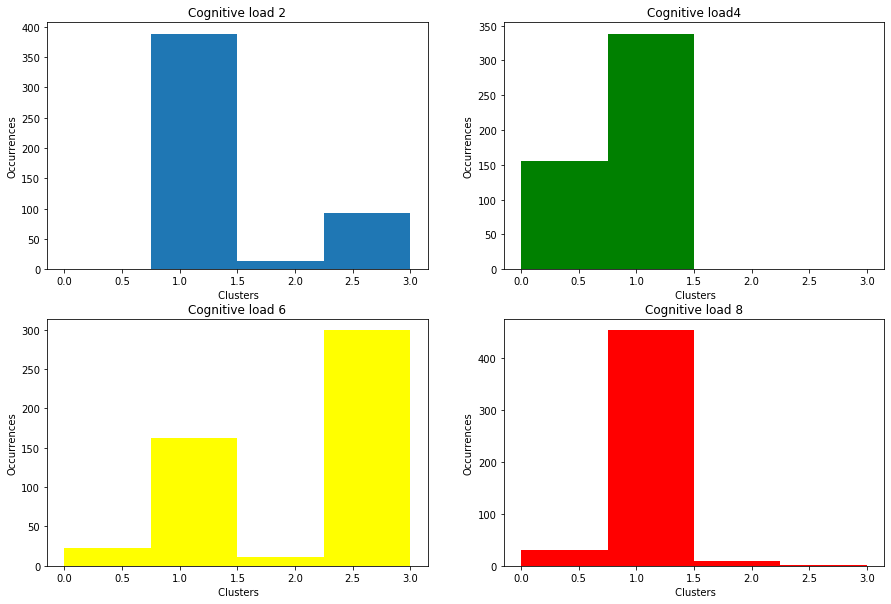

In [5]:
from sklearn.cluster import KMeans
#prediction on raw data
clf_full= GaussianMixture(4,"full")
clf_tied=GaussianMixture(4,"tied")


# Here we train the model with ERPS and predict cluster number of each single trial data

ypred2full,ypred4full= clf_full.fit_predict(raw_data2_sc),clf_full.fit_predict(raw_data4_sc)
ypred6full,ypred8full= clf_full.fit_predict(raw_data6_sc), clf_full.fit_predict(raw_data8_sc)

plt.figure(figsize=[15,10])
plt.subplot(221)
plt.hist(ypred2full,bins=4), plt.title("Cognitive load 2"), plt.xlabel(" Clusters"), plt.ylabel("Occurrences")

plt.subplot(222)
plt.hist(ypred4full,bins=4,color="green"), plt.title("Cognitive load4"), plt.xlabel(" Clusters"), plt.ylabel("Occurrences")

plt.subplot(223)
plt.hist(ypred6full,bins=4,color="yellow"), plt.title("Cognitive load 6"), plt.xlabel(" Clusters"), plt.ylabel("Occurrences")


plt.subplot(224)
plt.hist(ypred8full,bins=4,color="red"), plt.title("Cognitive load 8"), plt.xlabel(" Clusters"), plt.ylabel("Occurrences")
plt.show()


## 2. Clustering with k-MEANS 
similar to GMM, I used K-means clustering to cluster our single trial data into four clusters.
The largest cluster is believed to have the most relevant trials

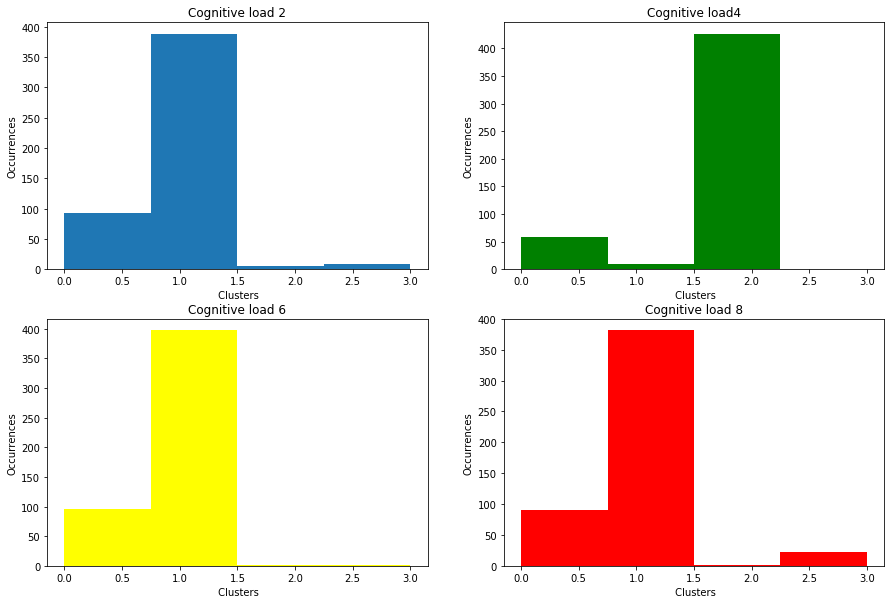

In [7]:
from sklearn.cluster import KMeans
#prediction on raw data
clf_full= GaussianMixture(4,"full")
clf_tied=GaussianMixture(4,"tied")
clf_kmeans=KMeans(4)
# clf8= GaussianMixture(2,"full")

# Here we train the model with ERPS and predict cluster number of each single trial data

ypred2kmeans,ypred4kmeans= clf_kmeans.fit_predict(raw_data2_sc),clf_kmeans.fit_predict(raw_data4_sc)
ypred6kmeans,ypred8kmeans= clf_kmeans.fit_predict(raw_data6_sc), clf_kmeans.fit_predict(raw_data8_sc)

plt.figure(figsize=[15,10])
plt.subplot(221)
plt.hist(ypred2kmeans,bins=4), plt.title("Cognitive load 2"), plt.xlabel(" Clusters"), plt.ylabel("Occurrences")

plt.subplot(222)
plt.hist(ypred4kmeans,bins=4,color="green"), plt.title("Cognitive load4"), plt.xlabel(" Clusters"), plt.ylabel("Occurrences")

plt.subplot(223)
plt.hist(ypred6kmeans,bins=4,color="yellow"), plt.title("Cognitive load 6"), plt.xlabel(" Clusters"), plt.ylabel("Occurrences")


plt.subplot(224)
plt.hist(ypred8kmeans,bins=4,color="red"), plt.title("Cognitive load 8"), plt.xlabel(" Clusters"), plt.ylabel("Occurrences")
plt.show()


## Selecting Single trials falling in good clusters
Finally I extracted single trials from the biggest clusters and saved them in a new file

In [9]:
def data_index(ypred,val):
    erp=[]
    for i in range(len(ypred)):
        if  ypred[i]==val:
            erp.append(i)
    return erp
            

In [10]:
erp2_index=[data_index(ypred2full,val=1),data_index(ypred2tied,val=0),data_index(ypred2kmeans,val=1)]
erp4_index=[data_index(ypred4full,val=1),data_index(ypred4tied,val=1),data_index(ypred4kmeans,val=2)]
erp6_index=[data_index(ypred6full,val=3),data_index(ypred6tied,val=3),data_index(ypred6kmeans,val=1)]
erp8_index=[data_index(ypred8full,val=1),data_index(ypred8tied,val=1),data_index(ypred8kmeans,val=1)]

##  selecting ERP data
final2_ndex=[]
final4_ndex=[]
final6_ndex=[]
final8_ndex=[]

### Here we select ERPS that are found in three clusters
for index2 in erp2_index[0]:
    if index2 in erp2_index[1]:
        final2_ndex.append(index2)
for index4 in erp4_index[0]:       
    if index4 in erp4_index[1]:
        final4_ndex.append(index4)
for index6 in erp6_index[0]:       
    if index6 in erp6_index[1]:
        final6_ndex.append(index6)
for index8 in erp8_index[1]:        
    if index8 in erp8_index[0]:
        final8_ndex.append(index8)

save("raw2_index2.npy", final2_ndex)
save("raw4_index2.npy",final4_ndex)
save("raw6_index2.npy", final6_ndex)
save("raw8_index2.npy", final8_ndex)


